### **Predicting Boston Housing Prices: A Machine Learning Regression Analysis**

The dataset that we are going to explore and build the ML model is Boston Dataset. Let's familiarize ourself with the dataset by doing exploratory data analysis.

There are 14 attributes in each case of the dataset. They are:
- CRIM : per capita crime rate by town
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS : proportion of non-retail business acres per town.
- CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX : nitric oxides concentration (parts per 10 million)
- RM : average number of rooms per dwelling
- AGE : proportion of owner-occupied units built prior to 1940
- DIS : weighted distances to five Boston employment centres
- RAD : index of accessibility to radial highways
- TAX : full-value property-tax rate per 10000 in dollar
- PTRATIO : pupil-teacher ratio by town
- BLACK : is the proportion of blacks by town
- LSTAT : % lower status of the population
- MEDV : Median value of owner-occupied homes in $1000's

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the necessary libraries to use
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

### **Eksploratory Data Analysis**

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Assignment 26 dan 28/Assignment 28/boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# sample 10 rows of the data
df.sample(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
345,0.03113,0.0,4.39,0,0.442,6.014,48.5,8.0136,3,352,18.8,385.64,10.53,17.5
284,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,32.2
393,8.64476,0.0,18.10,0,0.693,6.193,92.6,1.7912,24,666,20.2,396.90,15.17,13.8
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
238,0.08244,30.0,4.93,0,0.428,6.481,18.5,6.1899,6,300,16.6,379.41,6.36,23.7
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
473,4.64689,0.0,18.10,0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,11.66,29.8
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10,22.0


In [ ]:
#check rows with contains white space
df.eq(' ').sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
# check missing value
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
#show info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# number of duplicated data
df.duplicated().sum()

0

**Observations:**
* The dataset is clean: **no missing values** or **duplicate entries**, and all data is in numerical format. Overall is good!
* the dataset comprises **14 columns** and a total of **506 rows**.

In [ ]:
# numerical statistical summary
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Observations:**

1. **Crime Rate (crim):** The crime rate per capita varies a lot, from as low as 0.006 to as high as 88.97. The highest value seems like an outlier because it's very different from the median and the 75th percentile value.

2. **Residential Land Proportion (zn):** The proportion of residential land allocated for large lots (over 25,000 square feet) ranges from 0 to 100. The median value is 0, indicating that in many cities, there's no residential land allocated for large lots.

3. **Non-Retail Business Land Proportion (indus):** The proportion of non-retail business land per city varies from 0.46 to 27.74, with an average around 11.14. The high standard deviation shows significant variation in this proportion among cities.

4. **Charles River Border (chas):** This is a binary variable indicating whether a city borders the Charles River. About 93% of cities do not border it.

5. **Nitric Oxide Concentration (nox):** The concentration of nitric oxide ranges from 0.385 to 0.871, with an average around 0.55. This indicates differences in air pollution levels among cities.

6. **Average Number of Rooms (rm):** The average number of rooms per dwelling ranges from 3.561 to 8.78, with an average around 6.28. The low standard deviation suggests consistent room numbers in most houses.

7. **Age of Buildings (age):** The proportion of owner-occupied units built before 1940 ranges from 2.9% to 100%. The average age of buildings is around 68 years.

8. **Distance to Employment Centers (dis):** The weighted distances to five Boston employment centers vary greatly, with an average around 3.80 and a maximum of 12.13.

9. **Accessibility to Highways (rad):** The accessibility index to radial highways ranges from 1 to 24, with an average around 9.55.

10. **Property Tax Rate (tax):** The full property tax rate per $10,000 ranges from 187 to 711, with an average around 408.24.

11. **Pupil-Teacher Ratio (ptratio):** The ratio of students to teachers per city ranges from 12.6 to 22, with an average around 18.46.

12. **Percentage of Black Population (black):** The percentage of black residents per city ranges from 0.32 to 396.9.

13. **Percentage of Lower Status Population (lstat):** The percentage of population with lower social status ranges from 1.73 to 37.97, with an average around 12.65.

14. **Median Home Value (medv):** The median value of owner-occupied homes ranges from $5,000 to $50,000, with an average around $22,530.

<Axes: >

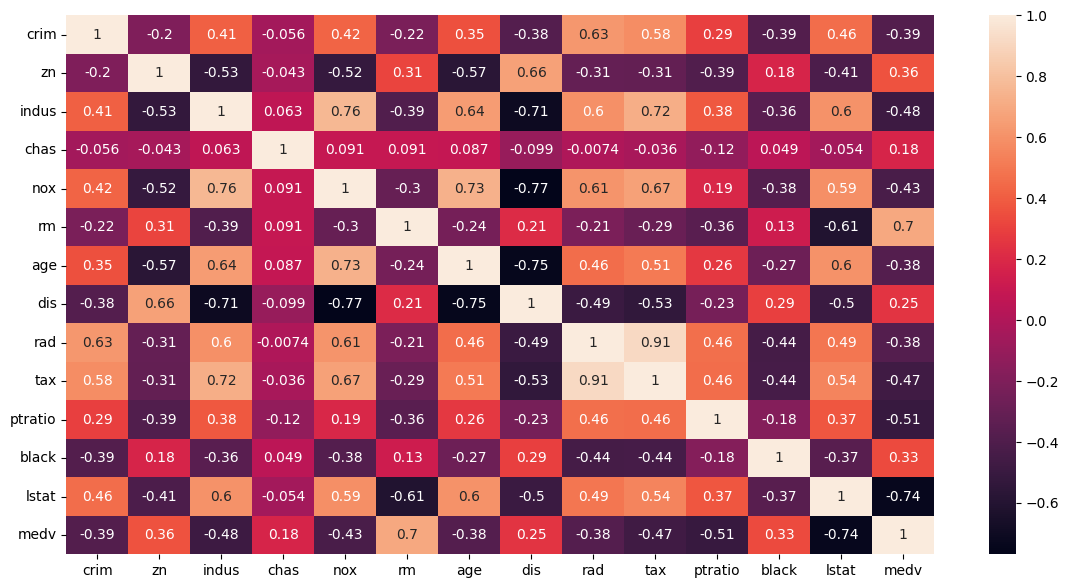

In [ ]:
# check the correlation between each feature
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(numeric_only = True),cbar=True,annot=True)

According to the correlation matrix, we see that there are some positive and negative correlation from our features towards our target variable

| Feature | Correlation Value |
|---------| ----------------- |
| ZN | 0.36 |
| CHAS | 0.18 |
| RM | 0.7 |
| DIS | 0.25 |
| BLACK | 0.33 |
| CHRIM | -0.39 |
| INDUS | -0.48 |
| NOX | -0.43 |
| AGE | -0.38 |
| RAD | -0.38 |
| TAX | -0.47 |
| PTRATIO | -0.51 |
| ISTAT | -0.74 |

Another interesting insight from the correlation matrix is the presence of several independent variables that have quite high correlations with each other.

| Feature - Feature	| Correlation Value |
| ----------------- | ----------------- |
| RAD - TAX |	0.91 |
| DIS - NOX	| 0.77 |
| NOX - INDUS |	0.76 |
| DIS - AGE |	0.75 |
| NOX - AGE |	0.73 |
| TAX - INDUS |	0.72 |
| DIS - INDUS	| 0.71 |

The one for which concerning is correlation between RAD and TAX, they are too correlated to each other although they are an independent variable. This is not good, since it can affect our model later on. However, the decision to whether we drop one of those columns is from the calculation using VIF score later in.

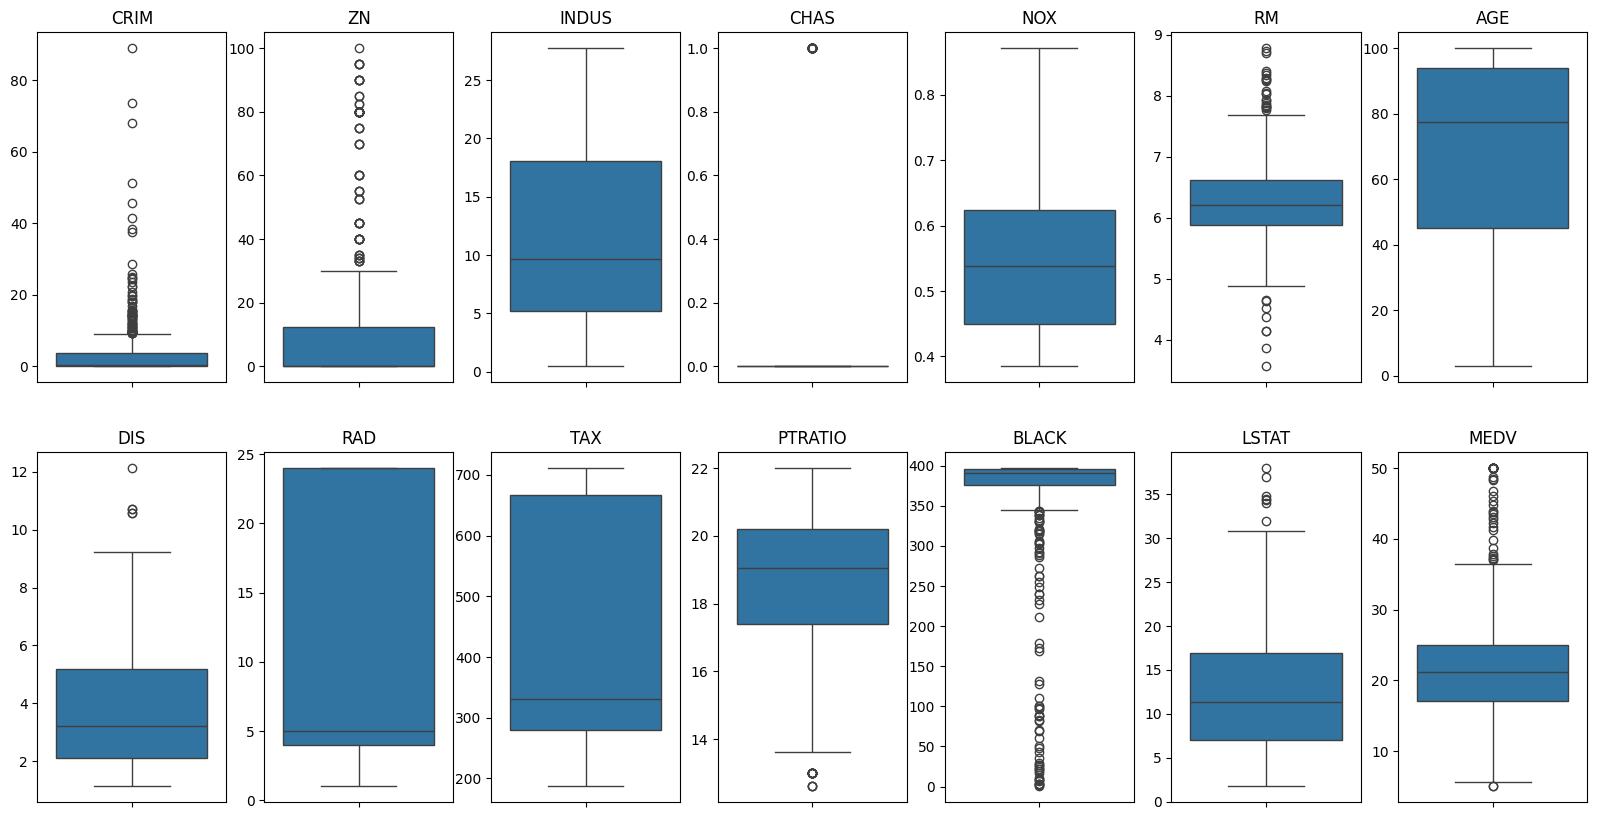

In [ ]:
#Boxplot to detect outliers
fig, axes = plt.subplots(2,7, figsize=(20,10))

for index, axs in enumerate(axes.flatten()):
    plot = sns.boxplot(data=df, y=df.columns[index], ax=axs)
    plot.set(xlabel='', ylabel='', title=df.columns[index].upper())

Observations:
* For `Chas` outliers might not be as relevant since it's a binary variable.
* It appears that `CRIM`, `ZN`, `RM`, `DIS`, `PTRATIO`, `BLACK`, `LSTAT`, and `MEDV` have many outliers based on the plots.

The question arises: should we remove these outliers? To address this, we need to further investigate.

First, let's calculate the percentage of outliers in each feature.

In [ ]:
outliers_list = []

for col in df.columns:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)

    IQR  = percentile75 - percentile25

    upper_limit = percentile75 + 1.5*IQR
    lower_limit = percentile25 - 1.5*IQR

    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    percentage = outliers.shape[0] / df.shape[0] * 100

    outlier_dict = {'Feature' : col.upper(),
                    'Outlier Percentage' : f'{percentage:.2f}' + '%'}

    outliers_list.append(outlier_dict)

# display it using dataframe for better reading
outlier_df = pd.DataFrame(outliers_list)
outlier_df

,Feature,Outlier Percentage
0,CRIM,13.04%
1,ZN,13.44%
2,INDUS,0.00%
3,CHAS,6.92%
4,NOX,0.00%
5,RM,5.93%
6,AGE,0.00%
7,DIS,0.99%
8,RAD,0.00%
9,TAX,0.00%


**Observations:**

Features with outlier > 5% are concerning. The outliers are too much. This outliers can be caused by many error, it can be measurement error, wrong data collection, or wrong data entry. However, not all the outliers bad. Deleting all the outlier outside the upper_limit and lower_limit of **interquantile calculation*** above is not a good option either, since it can reduce our dimesion too much. The model might find it hard to learn if we have small dimension. So we just need to be a little bit smart how to deal with this outlier.

Note from dataset (https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

> *Variable #14 seems to be censored at 50.00 (corresponding to a median price of 50,000); Censoring is suggested by the fact that the highest median price of exactly 50,000 is reported in 16 cases, while 15 cases have prices between 40,000 and 50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.*

This indicates that there's a limitation in the data, where the actual prices might be higher but are censored to $50,000.

It's suggested by the fact that many houses could have higher prices but are recorded as $50,000. So, let us remove all the data in ourdataframe of MEDV == 50.00

In [ ]:
#Percentage of outliers removed
medv_50 = df[(df['medv'] == 50.0)]
percentage = medv_50.shape[0]/df.shape[0]*100

print(f'Persentage medv=50.0 : {percentage:.2f}' + '%')

Persentage medv=50.0 : 3.16%


The percentage of removed outliers is 16/506, approximately 3.16%, which is less than 5% of the entire dataset. Therefore, it is considered okay.

In [ ]:
# remove outliers if medv == 50.00
df = df[~(df['medv'] == 50.0)]

Oood!

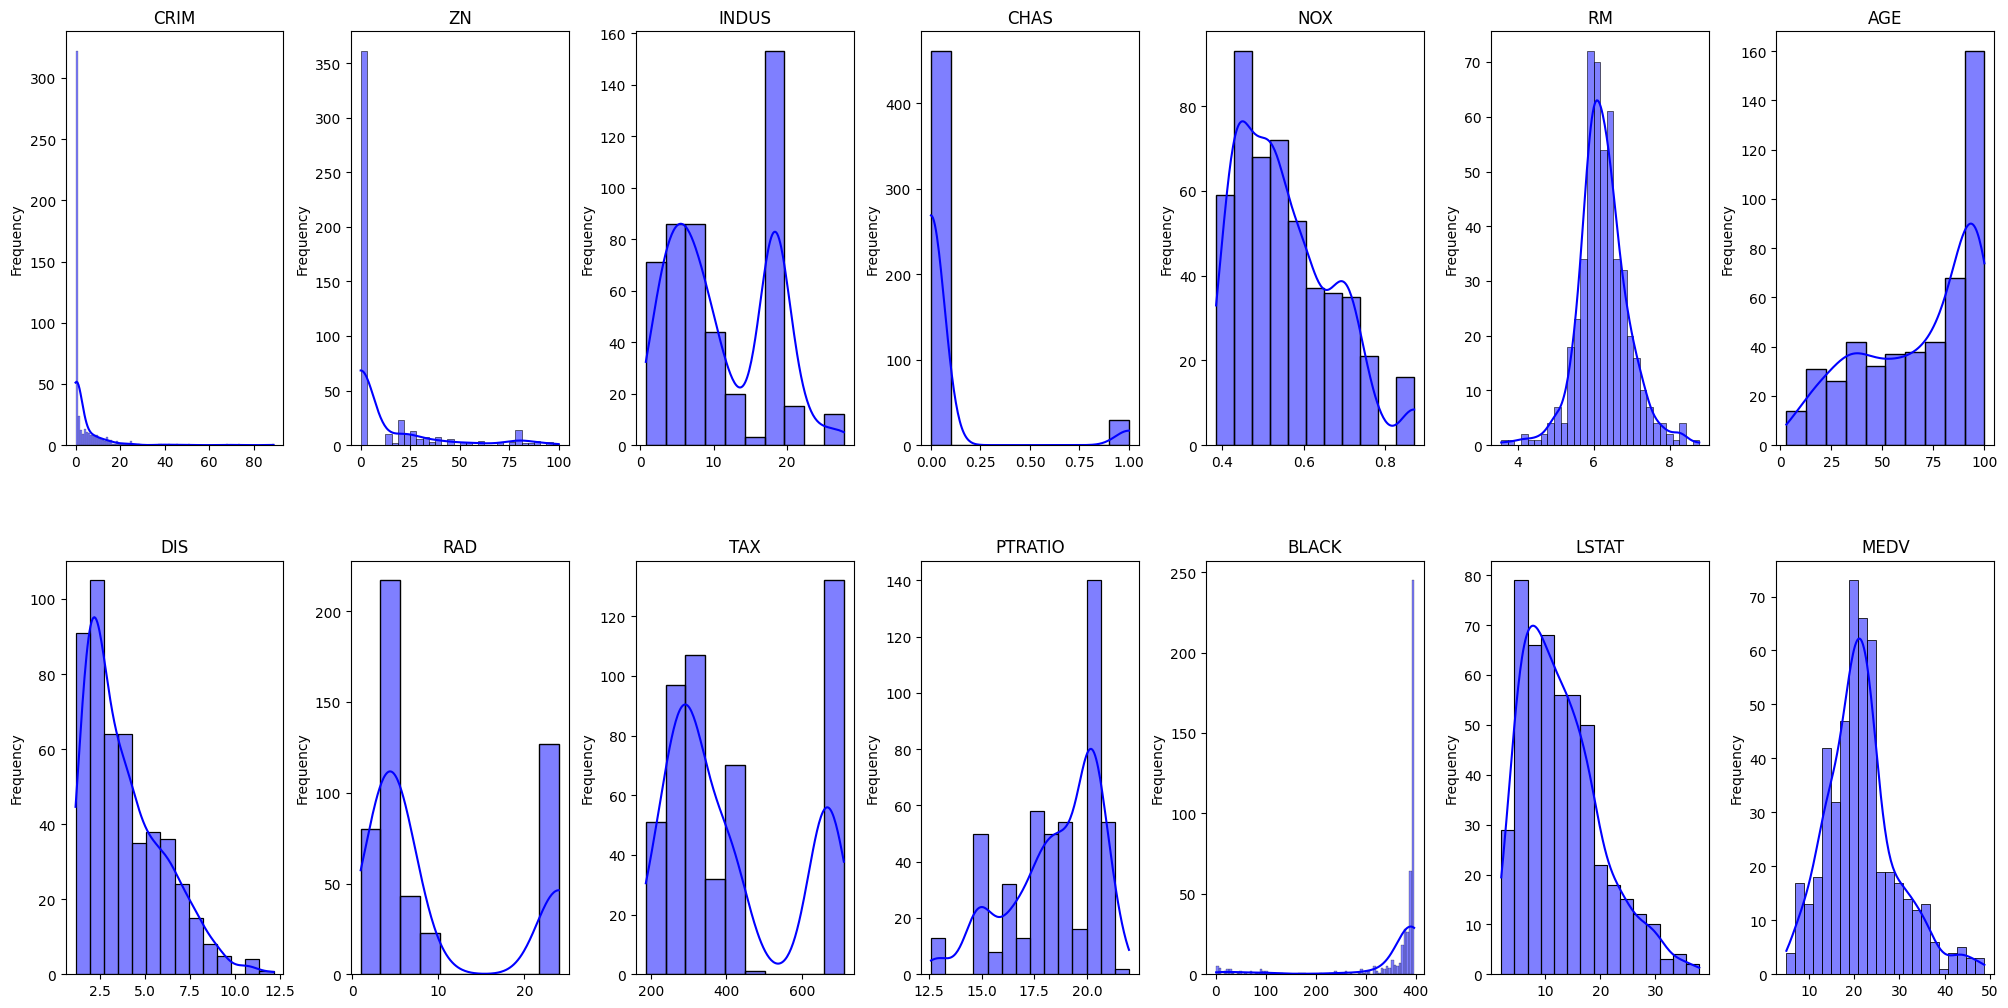

In [ ]:
#KDE plot for knowing the distribution form
fig, axes = plt.subplots(2,7, figsize=(20,10))

for index, axs in enumerate(axes.flatten()):
    plot = sns.histplot(data=df, x=df.columns[index], color='blue', kde=True, ax=axs)
    plot.set(xlabel='', ylabel='Frequency', title=df.columns[index].upper())

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Observations:

* As we can see on the graph above, the feature which normally distributed is only `RM`. Column `MEDV` is a litlle bit skewed to the left, but show a normal distribution properties.
* Other features show either they're skewed to the left or to the right.
* The variables `CRIM`, `ZN`, `NOX`, `DIS`, and `LSTAT` exhibit a left-skewed distribution, meaning they tend to have lower values. This suggests that most areas have low crime rates, small residential land proportions, low nitrogen oxide levels, short distances to workplaces, and high percentages of economically disadvantaged residents.
* The presence of two peaks in the distributions of `INDUS`, `RAD`, and `TAX` indicates the existence of two different groups or categories within each variable
* `PTRATIO` (pupil-teacher ratio) and `Black` (proportion of black residents) are skewed to the right. For PTRATIO, this suggests fewer students per teacher on average, while for Black, it indicates fewer towns with a higher proportion of black residents.
* for `CHAS `(Charles River dummy variable), it means that more towns do not border the Charles River than those that do. In simpler terms, there are more towns without riverfront access than those with it.

In [ ]:
features_cols = df.columns[:-1]

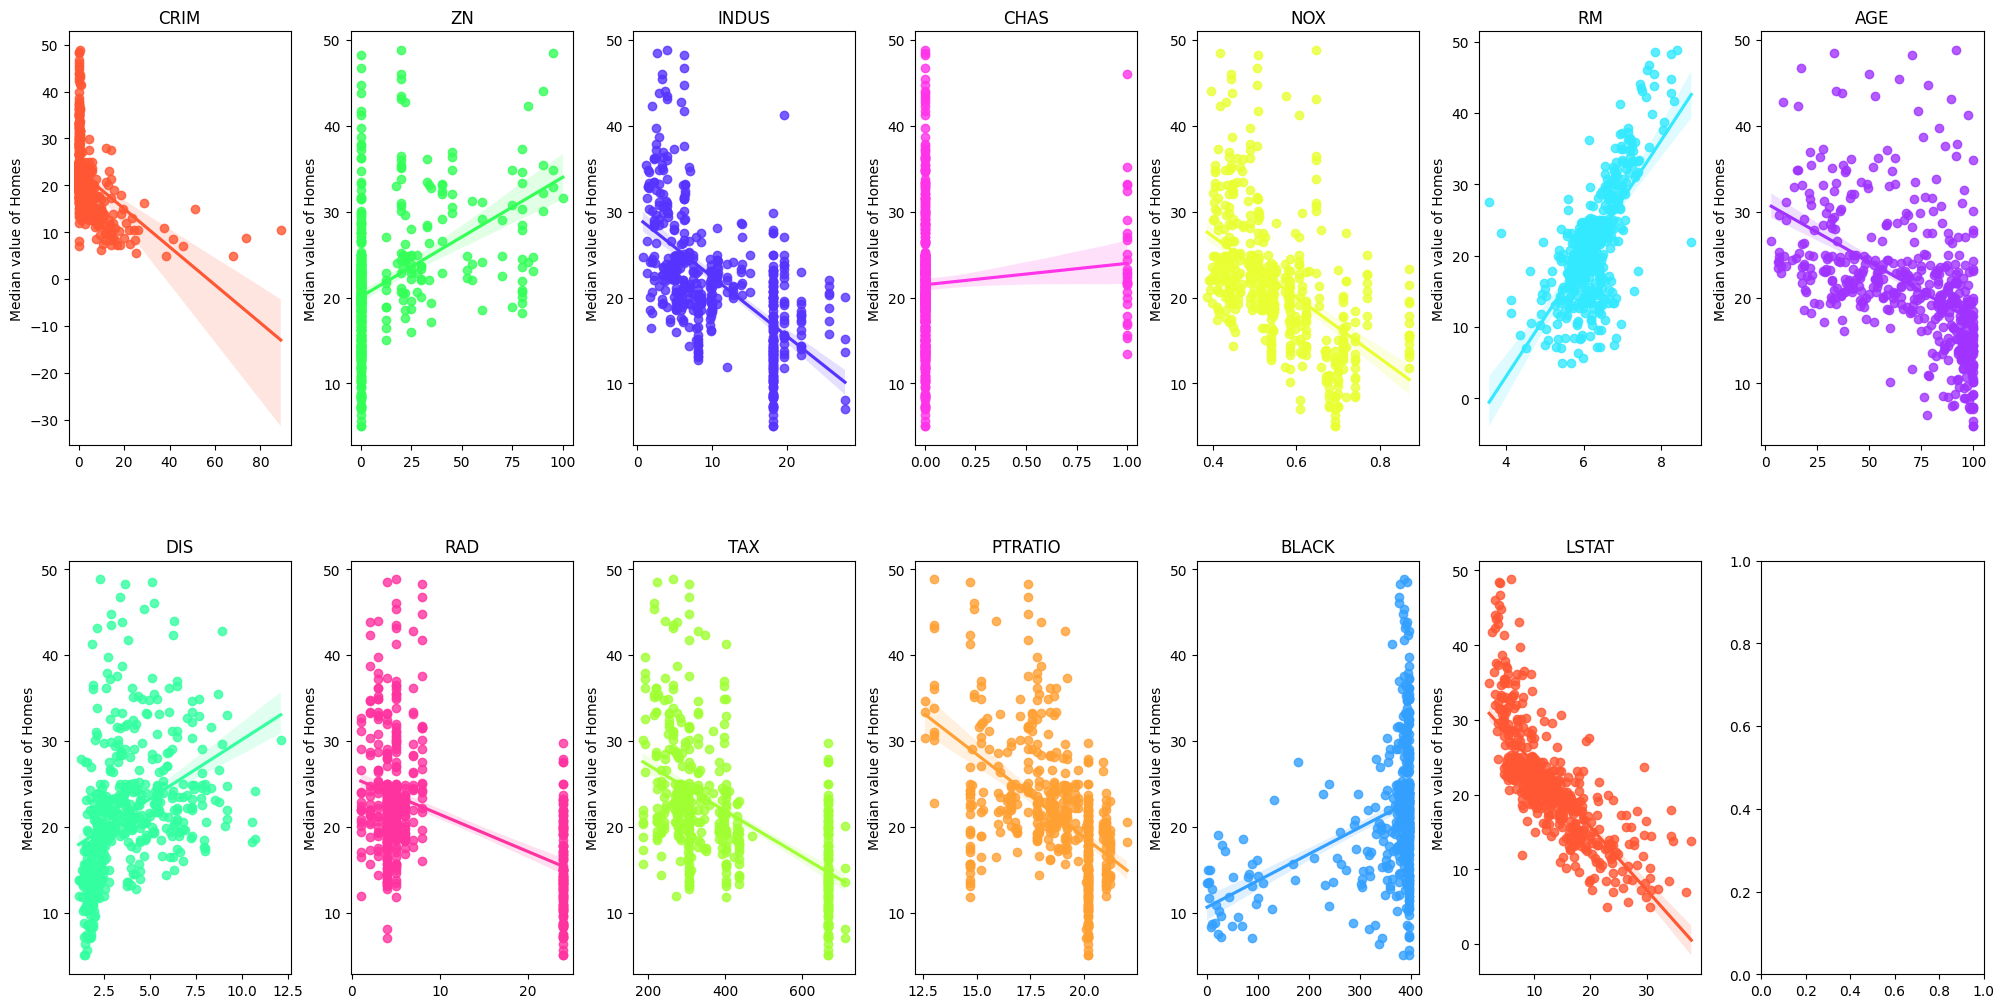

In [ ]:
fig, axes = plt.subplots(2,7, figsize=(20,10))

colors = ['#FF5733', '#33FF57', '#5733FF', '#FF33E9', '#E9FF33', '#33E9FF', '#A033FF', '#33FFA0', '#FF33A0', '#A0FF33', '#FFA033', '#33A0FF', '#FF5733', '#33FF57']

for index, axs in enumerate(axes.flatten()[:len(features_cols)]):
    plot = sns.regplot(x=features_cols[index], y='medv', data=df, ax=axs, color=colors[index])
    plot.set(xlabel='', ylabel='Median value of Homes', title=features_cols[index].upper())

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**Observations:**
* Feature `RM` and `LSTAT` have a high linearity relationship with our target variable. This mean `RM` and `LSTAT` are very important feature to predict our target value.
* `CHAS` seems not good to view it using Regplot since the value is only 1.0 and 0.0, a binary value.
* The other feature, even though are not show high correlation score toward `MEDV`, but still show us a linearity relationship with our target variable.

## **Data Preprocessing**

In [ ]:
# Check multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(df)
vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])],
                      index = X.columns).reset_index()
vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature != 'const']
vif_df

,feature,vif_score
1,crim,1.857447
2,zn,2.341156
3,indus,4.001702
4,chas,1.062984
5,nox,4.555137
6,rm,2.323684
7,age,3.146900
8,dis,4.450737
9,rad,7.712862
10,tax,9.180077


There are several features with high VIF scores (VIF between 4 and 10 indicate Moderate multicollinearity)
1. `nox`
2. `rad`
3. `tax`
4. `dis`

<Axes: >

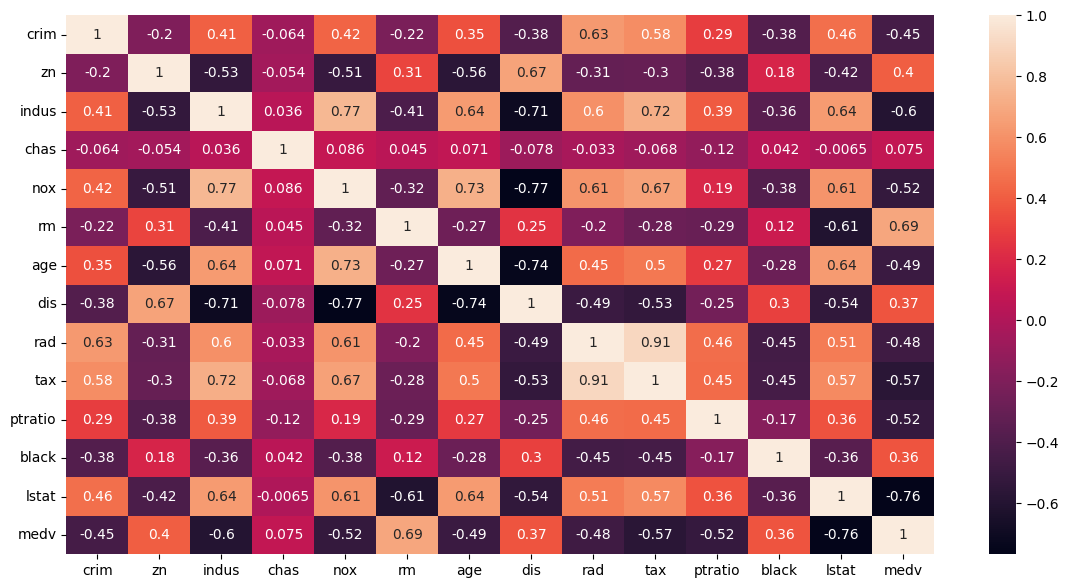

In [ ]:
# check the correlation between each feature
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(numeric_only = True),cbar=True,annot=True)

If we set the threshold for high correlation to be >= 0.8, one concerning correlation is between `RAD` and `TAX`. They are highly correlated despite being independent variables. This situation is not desirable as it can potentially affect our model later on. Therefore, we need to drop one of them.

Observing that TAX has a higher correlation with `MEDV`(the target variable), we will drop `RAD`. As for the other variables, their correlations are below 0.8, thus they do not meet the threshold and we will keep them without dropping any.

In [ ]:
feature = df.drop(columns='medv')

#drop feature rad since it contribute a lot to collinearity, has 0.91 correlation with tax
feature = feature.drop(columns = 'rad', axis=1)

target = df['medv']

In [ ]:
# Check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

def calculate_vif(feature):

    X = add_constant(feature)
    vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])],
                          index = X.columns).reset_index()
    vif_df.columns = ['feature', 'vif_score']
    vif_df = vif_df.loc[vif_df.feature != 'const']
    return vif_df

calculate_vif(feature)

,feature,vif_score
1,crim,1.660929
2,zn,2.258495
3,indus,3.730526
4,chas,1.051111
5,nox,4.313545
6,rm,1.830758
7,age,3.095327
8,dis,3.976043
9,tax,3.402420
10,ptratio,1.659440


Good!

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

# First splitting: pretrain and test
X_pretrain, X_test, y_pretrain, y_test = train_test_split(feature,
                                                              target,
                                                              test_size = 0.2,
                                                              random_state = 42)

# Second splitting: train and validation
X_train, X_val, y_train, y_val = train_test_split(X_pretrain,
                                                  y_pretrain,
                                                  test_size = 0.2,
                                                  random_state = 42)

In [ ]:
#Check the shape of the train, test, and validation data

# feature and target shape
print('Feature shape before split : {}'.format(feature.shape))
print('Target shape before split : {}'.format(target.shape))
print()

# train shape, we take 60% from the original data
print('X_train shape : {}'.format(X_train.shape))
print('y_train shape : {}'.format(y_train.shape))
print()

# test shape, we take 20% from the original data
print('X_test shape : {}'.format(X_test.shape))
print('y_test shape : {}'.format(y_test.shape))
print()

# validation shape, we take 20% from the original data
print('X_val shape : {}'.format(X_val.shape))
print('y_val shape : {}'.format(y_val.shape))

Feature shape before split : (490, 12)
Target shape before split : (490,)

X_train shape : (313, 12)
y_train shape : (313,)

X_test shape : (98, 12)
y_test shape : (98,)

X_val shape : (79, 12)
y_val shape : (79,)


### **Machine Learning Model**

From this section, we are going to build machine learning regression model. Two are three models that will be used.

- Ridge
- Lasso

Import those models from sklearn library

## **Ridge regression**

### **Model Training**

In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

alpha = [0.01, 0.1, 1, 10]

#Lets get the best lambda for ridge regression model
for al in alpha:
    ridge = Ridge(alpha = al, random_state = 42)
    ridge.fit(X_train.to_numpy(), y_train.to_numpy())

    y_predict_ridge = ridge.predict(X_val.to_numpy())

    rmse_ridge = np.sqrt(mean_squared_error(y_val, y_predict_ridge))
    print('RMSE ridge for alpha : {}, is {}'.format(al, rmse_ridge))

RMSE ridge for alpha : 0.01, is 4.846384301222291
RMSE ridge for alpha : 0.1, is 4.851736861001828
RMSE ridge for alpha : 1, is 4.8821556493298885
RMSE ridge for alpha : 10, is 4.930795124733116


We can see that Ridge with `alpha=0.01` has the smalles RMSE --> The best model

In [ ]:
# Since RMSE calculation from alpha = 0.01 gives the lowest value, we will use alpha = 0.01 further in the model

ridge = Ridge(alpha = 0.01, random_state = 42)
ridge.fit(X_train.to_numpy(), y_train.to_numpy())

Ridge(alpha=0.01, random_state=42)

In [ ]:
# Interpreting the coefficient and intercept
def coeficient(model, feature):

    coef = pd.DataFrame(
        {'intercept' : ['intercept'] + feature.columns.to_list(),
         'coefficient' : [model.intercept_] + list(model.coef_)})

    return coef

coeficient(ridge, feature)

,intercept,coefficient
0,intercept,26.642949
1,crim,-0.087852
2,zn,0.040947
3,indus,-0.098724
4,chas,1.391230
5,nox,-7.627625
6,rm,3.447913
7,age,-0.005746
8,dis,-1.252021
9,tax,-0.001928


**Observations:**
- The median house price without any influencing factors is approximately `$26,642.` For each unit increase in crime rate, the median house price decreases by about `$0.09`, while an increase in residential land size boosts it by about $0.04 per unit, and so on for other factors.

### **Model Diagnostic**

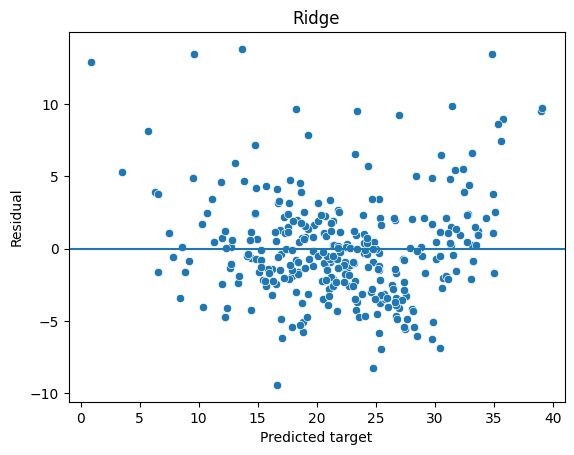

In [ ]:
# residual plots
def residual_plots(model, X, y):

    model_name = type(model).__name__

    y_pred = model.predict(X.to_numpy())

    residual = y.to_numpy() - y_pred

    df_residual = pd.DataFrame({'x_axis' : y_pred,
                                'residual' : residual})

    # Plot the resiual
    plot = sns.scatterplot(data = df_residual, x = 'x_axis', y = 'residual')
    plot.set(xlabel = 'Predicted target', ylabel = 'Residual',
             title = model_name)
    plt.axhline(0)

    return residual

residual = residual_plots(ridge, X_train, y_train)

Assumptions:
1.  The relationship between variables is linear, which seems to be fine as indicated by the horizontal line y=0 representing the residual points.
2. Uncorrelated residuals between different
observations.
3. There are no noticeable patterns in the consecutive residuals.

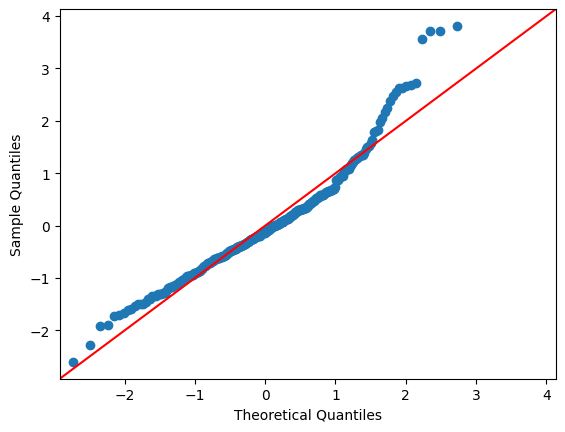

In [ ]:
# QQplot to check normal distribution
def QQplot(residual):

    std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
    std_resid = np.array([value for nested_array in std_resid for value in nested_array])

    sm.qqplot(std_resid, line='45')
    plt.show()

QQplot(residual)

Transformed residuals closely align with the normality line, indicating normally distributed residuals.

### **Model Evaluation**

In [ ]:
# evaluate model metrics, R-squared, RMSE, MAE, and MAPE
def model_evaluation(model, X, y, cols):

    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)

    accuracy = pd.DataFrame({'R-squared' : r2,
                             'RMSE' : rmse,
                             'MAE' : mae,
                             'MAPE' : mape}, index = [cols])
    return accuracy.T

def model_scores(model, X_train, y_train, X_test, y_test, X_val, y_val):

    model_name = type(model).__name__

    X = [X_train.to_numpy(), X_test.to_numpy(), X_val.to_numpy()]
    y = [y_train.to_numpy(), y_test.to_numpy(), y_val.to_numpy()]

    cols = ['Training', 'Test', 'Validation']

    scores = pd.DataFrame()
    for i in range(len(X)):
        accuracy = model_evaluation(model, X[i], y[i], cols[i] + ' '+ model_name)
        scores = pd.concat([scores, accuracy], axis=1)

    return scores

In [ ]:
ridge_scores = model_scores(ridge, X_train, y_train, X_test, y_test, X_val, y_val)
ridge_scores

,Training Ridge,Test Ridge,Validation Ridge
R-squared,0.782265,0.728783,0.694196
RMSE,3.623404,3.722263,4.846384
MAE,2.671235,2.831413,3.449171
MAPE,0.136887,0.169110,0.178520


**Observations:**

- In this Ridge Regression modeling, the results show that the model has an R-squared of 0.78 on the Training data, but decreases to 0.73 on the Test data. On the Validation data, used to determine the best lambda value, there is also a decrease to 0.69, indicating that the model built performs well on the Training data with an R-squared of 0.78, but experiences a performance drop on the Test data with an R-squared decreasing to 0.73. This suggests that the model might slightly lose its generalization ability when tested on unseen new data.
- In terms of RMSE, the obtained results are relatively small compared to the range of predicted target values. Despite experiencing a slight increase on the Test data and a significant increase on the Validation data, it can still be said that the model's predictions are quite close to the actual values, indicating a fairly good model performance.
- Similarly, the MAE results also indicate relatively small errors, meaning the average prediction error of the model is around `$2,700` for the Training data, `$2,800` for the new data (Test), and about `$3,500` for the Validation data. This suggests a good model performance, especially when the predicted house prices have a wide range.
- The MAPE (Mean Absolute Percentage Error) of 0.13 on the Training data, 0.17 on the Test data, and 0.18 on the Validation data. This means the model's predictions have an error of 13% for the Training data, 0.17% for the Test data, and 18% for the Validation data, on average, compared to the actual values. In the context of house price prediction, a low MAPE indicates that the model has a relatively small error rate in estimating house prices. Therefore, the obtained MAPE can still be considered as a good performance indicator for the house price prediction model.

## **Lasso Regression**

### **Model Training**

In [ ]:
from sklearn.linear_model import Lasso

alpha = [0.01, 0.1, 1, 10]

#Lets get the best lambda for ridge regression model
for al in alpha:
    lasso = Lasso(alpha = al, random_state = 42)
    lasso.fit(X_train.to_numpy(), y_train.to_numpy())

    y_predict_ridge = lasso.predict(X_val.to_numpy())

    rmse_ridge = np.sqrt(mean_squared_error(y_val, y_predict_ridge))
    print('RMSE lasso for alpha : {}, is {}'.format(al, rmse_ridge))

RMSE lasso for alpha : 0.01, is 4.867963774404444
RMSE lasso for alpha : 0.1, is 4.881813427463958
RMSE lasso for alpha : 1, is 5.577583803488553
RMSE lasso for alpha : 10, is 5.902504917779449


We can see that Ridge with `alpha=0.01` has the smalles RMSE --> The best model

In [ ]:
lasso = Lasso(alpha = 0.01, random_state = 42)
lasso.fit(X_train.to_numpy(), y_train.to_numpy())

Lasso(alpha=0.01, random_state=42)

In [ ]:
coeficient(lasso, feature)

,intercept,coefficient
0,intercept,24.308413
1,crim,-0.086865
2,zn,0.041048
3,indus,-0.112454
4,chas,1.197776
5,nox,-4.287524
6,rm,3.467064
7,age,-0.008216
8,dis,-1.190210
9,tax,-0.002588


**Observations:**
- In the absence of influencing factors, the median house price is expected to be around $24.31. Each unit increase in crime rate (CRIM) decreases the house price by 0.087, while an increase in residential land size (ZN) boosts it by 0.041, and so on for other factors.

### **Model Diagnostic**

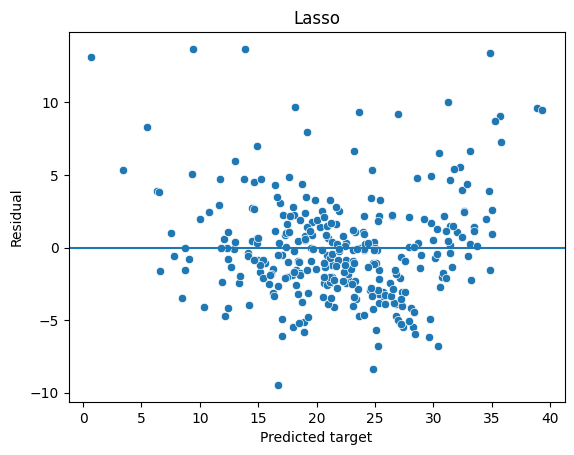

In [ ]:
residual_lasso = residual_plots(lasso, X_train, y_train)

Assumptions:

The above plot shows that there is no clear pattern, and that the points are randomly and uniformly scattered on the x axist, and therefore the linearity assumption is satisfied.

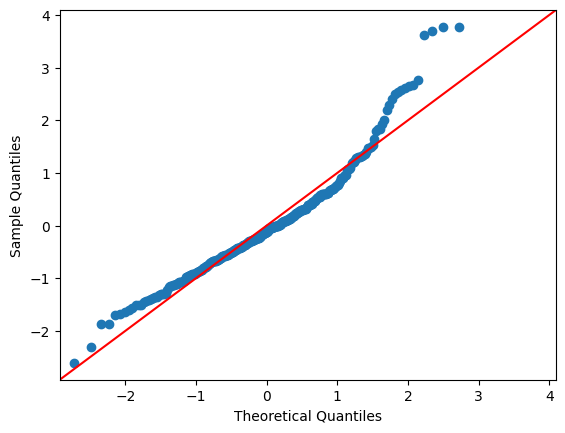

In [ ]:
QQplot(residual_lasso)

The residuals after transformation closely match the expected pattern for a normal distribution, suggesting that they follow a normal distribution pattern.

### **Model Evaluation**

In [ ]:
lasso_scores = model_scores(lasso, X_train, y_train, X_test, y_test, X_val, y_val)
lasso_scores

,Training Lasso,Test Lasso,Validation Lasso
R-squared,0.781656,0.725575,0.691467
RMSE,3.628474,3.744207,4.867964
MAE,2.676281,2.841554,3.459525
MAPE,0.137223,0.170028,0.180247


**Observations:**
- When compared to Lasso modeling, the results obtained are not significantly different, with differences only in decimal values, slightly smaller in Ridge Regression modeling compared to Lasso. This indicates that in Lasso Regression modeling, it also shows relatively good performance in predicting house prices, as evidenced by the reasonably good R-squared values. The model also has relatively small errors in predictions, as seen from the low values of RMSE, MAE, and MAPE.

**Conclutions:**
- Overall, the model performs quite well with R-squared values of 0.78 for training data, 0.73 for test data, and 0.69 for validation data. Despite a slight decrease from the training set to testing and validation, overall performance remains good, indicating a relatively small decline in predictive power for unknown data (new data).

- Both models also have relatively small values for RMSE, MAE, and MAPE, indicating low prediction errors. The models perform well on known data but experience a slight decrease in performance on new data. However, there is no significant difference between the training, testing, and validation datasets, indicating that both models are neither underfitting nor overfitting.
- Overall, both Ridge regression and Lasso regression models have similar evaluation results, with Ridge regression slightly outperforming Lasso regression before PCA.

Now, we will attempt modeling by performing PCA.

### **PCA**

In [ ]:
# scaling the value into unit variance
scaler = StandardScaler()
scaler.fit(feature)
df_std = scaler.transform(feature)

feature_scaling = pd.DataFrame(data = df_std, columns = feature.columns)
feature_scaling.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat
0,-0.417401,0.301813,-1.291856,-0.250812,-0.139895,0.505040,-0.109432,0.121208,-0.667101,-1.527280,0.443535,-1.122679
1,-0.414992,-0.486924,-0.593329,-0.250812,-0.731821,0.269017,0.377488,0.537330,-0.988734,-0.341504,0.443535,-0.534772
2,-0.414995,-0.486924,-0.593329,-0.250812,-0.731821,1.439934,-0.255152,0.537330,-0.988734,-0.341504,0.399553,-1.256937
3,-0.414412,-0.486924,-1.310933,-0.250812,-0.826186,1.153335,-0.798939,1.056878,-1.107857,0.085376,0.419005,-1.410980
4,-0.410202,-0.486924,-1.310933,-0.250812,-0.826186,1.381694,-0.500390,1.056878,-1.107857,0.085376,0.443535,-1.073216


In [ ]:
feature_pca = feature_scaling
target_pca = target

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(feature_pca)
pca_transform = pca.transform(feature_pca)

X_pca = pd.DataFrame(data = pca_transform, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6','pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12'])
y_pca = target_pca.copy()

df_pca_transform = pd.concat([X_pca, y_pca], axis=1)
df_pca_transform.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,medv
0,-1.910252,0.750437,0.563397,-0.427309,-0.983747,0.130670,0.466288,0.161043,0.411311,-0.604730,0.125650,0.205112,24.0
1,-1.242074,0.482002,-0.536497,-0.560541,-0.192910,-0.276110,0.647757,-0.343146,-0.014593,-0.132605,-0.614397,0.130977,21.6
2,-1.941399,0.572305,0.241631,-1.319066,0.342074,-0.211589,0.498145,0.072713,-0.205128,-0.005943,-0.502651,-0.126230,34.7
3,-2.553407,0.085857,-0.133718,-1.079825,0.710108,-0.397275,0.697767,0.178224,-0.088061,-0.484430,-0.275413,-0.386322,33.4
4,-2.389733,0.171088,-0.072155,-1.136606,0.663643,-0.336148,0.743156,-0.224779,-0.296267,-0.454538,-0.289378,-0.396849,36.2


In [ ]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_*100)

Explained variance: [5.59876912 1.30333851 1.10497762 0.88887253 0.79448055 0.63651936
 0.52780889 0.40523037 0.22033884 0.20326805 0.17872506 0.16221097]
Explained variance ratio: [46.56119217 10.83898861  9.18935471  7.39215418  6.60715968  5.29350283
  4.38943109  3.37002811  1.83240974  1.69044349  1.48633599  1.3489994 ]


In [ ]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 46.56119217,  57.40018078,  66.58953549,  73.98168967,
        80.58884935,  85.88235218,  90.27178327,  93.64181138,
        95.47422112,  97.16466461,  98.6510006 , 100.        ])

**Observations:**
- From 12 features -> pc1, 46.6% of the original information is covered, with 53.4% information loss.
- From 12 features -> pc1 + pc2, 57.4% of the original information is covered, with 42.6% information loss.
- From 12 features -> pc1 + pc2 + pc3, 66.6% of the original information is covered, with 33.4% information loss.
- From 12 features -> pc1 + pc2 + pc3 + pc4, 74.0% of the original information is covered, with 26.0% information loss.
- From 12 features -> pc1 + pc2 + pc3 + pc4 + pc5, 80.6% of the original information is covered, with 19.4% information loss.
- From 12 features -> pc1 + pc2 + pc3 + pc4 + pc5 + pc6, 85.9% of the original information is covered, with 14.1% information loss, and so on.

Since the minimum requirement is to cover at least 80% of the information, the 12 features will be reduced to 5 features.

In [ ]:
# With n_components = 5, we have already capture 80% of the variance in the input dataset

pca = PCA(n_components=5)
pca.fit(feature_pca)
pca_transform = pca.transform(feature_pca)

X_pca = pd.DataFrame(data = pca_transform, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
y_pca = target_pca.copy()

df_pca_transform = pd.concat([X_pca, y_pca], axis=1)
df_pca_transform.head()

,pc1,pc2,pc3,pc4,pc5,medv
0,-1.910252,0.750437,0.563397,-0.427309,-0.983747,24.0
1,-1.242074,0.482002,-0.536497,-0.560541,-0.192910,21.6
2,-1.941399,0.572305,0.241631,-1.319066,0.342074,34.7
3,-2.553407,0.085857,-0.133718,-1.079825,0.710108,33.4
4,-2.389733,0.171088,-0.072155,-1.136606,0.663643,36.2


In [ ]:
# First splitting: pretrain and test
X_pretrain_pca, X_test_pca, y_pretrain_pca, y_test_pca = train_test_split(X_pca, y_pca,
                                                                    test_size=0.25,
                                                                    random_state=42)

# Second splitting: train and validation
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_pretrain_pca,
                                                  y_pretrain_pca,
                                                  test_size = 0.25,
                                                  random_state = 42)

In [ ]:
#Check the shape of the train, test, and validation data

# feature and target shape
print('Feature PCA shape before split : {}'.format(feature_pca.shape))
print('Target PCA shape before split : {}'.format(target_pca.shape))
print()

# train shape, we take 75% from the original data
print('X_train PCA shape : {}'.format(X_train_pca.shape))
print('y_train PCA shape : {}'.format(y_train_pca.shape))
print()

# test shape, we take 25% from the original data
print('X_test PCA shape : {}'.format(X_test_pca.shape))
print('y_test PCA shape : {}'.format(y_test_pca.shape))
print()

# test shape, we take 25% from the original data
print('X_val PCA shape : {}'.format(X_val_pca.shape))
print('y_val PCA shape : {}'.format(y_val_pca.shape))
print()

Feature PCA shape before split : (490, 12)
Target PCA shape before split : (490,)

X_train PCA shape : (275, 5)
y_train PCA shape : (275,)

X_test PCA shape : (123, 5)
y_test PCA shape : (123,)

X_val PCA shape : (92, 5)
y_val PCA shape : (92,)



### **Ridge Regression after doing PCA**

In [ ]:
alpha = [0.01, 0.1, 1, 10]

#Lets get the best lambda for ridge regression model
for al in alpha:
    ridge = Ridge(alpha = al, random_state = 42)
    ridge.fit(X_train_pca.to_numpy(), y_train_pca.to_numpy())

    y_predict_ridge = ridge.predict(X_val_pca.to_numpy())

    rmse_ridge = np.sqrt(mean_squared_error(y_val_pca, y_predict_ridge))
    print('RMSE ridge for alpha : {}, is {}'.format(al, rmse_ridge))

RMSE ridge for alpha : 0.01, is 4.617735074160734
RMSE ridge for alpha : 0.1, is 4.61766185015988
RMSE ridge for alpha : 1, is 4.616952131416447
RMSE ridge for alpha : 10, is 4.611969644626184


We can see that Ridge with `alpha=10` has the smalles RMSE --> The best model

In [ ]:
ridge_pca = Ridge(alpha=10, random_state = 42)
ridge_pca.fit(X_train_pca, y_train_pca)

Ridge(alpha=10, random_state=42)

In [ ]:
coeficient(ridge_pca, X_pca)

,intercept,coefficient
0,intercept,21.882467
1,pc1,-2.456884
2,pc2,1.862767
3,pc3,1.978167
4,pc4,-2.103794
5,pc5,-0.081196


**Observations:**
- After PCA, the model coefficients become simpler with only 5 features compared to the previous 12 features.
- The intercept (0.031378) indicates the predicted value when all features are zero. The negative coefficient for feature 1 suggests a negative relationship with the prediction, while the positive coefficients for features 2, 3, and 5 indicate a positive relationship with the prediction. The negative coefficient for feature 4 suggests a negative relationship with the prediction.

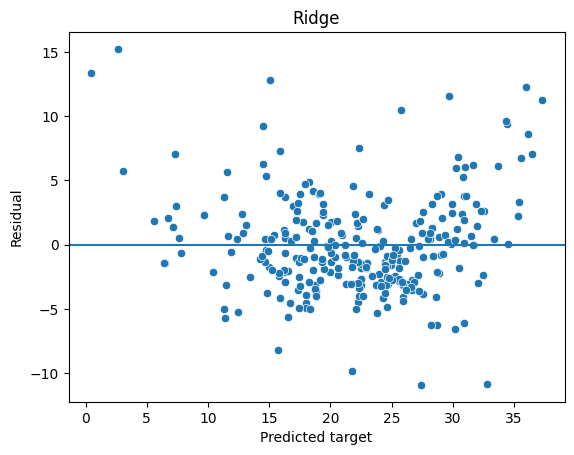

In [ ]:
residual_ridge_pca = residual_plots(ridge_pca, X_train_pca, y_train_pca)

The residuals do not show a significant difference before and after PCA.

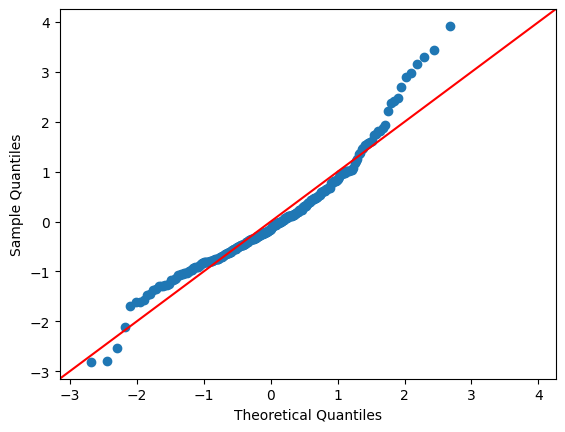

In [ ]:
QQplot(residual_ridge_pca)

There is a slight change in the QQ plot after PCA, but it can still be said that the transformed residuals align with the normality line, indicating normally distributed residuals.

In [ ]:
ridge_pca_scores = model_scores(ridge_pca, X_train_pca, y_train_pca, X_test_pca, y_test_pca, X_val_pca, y_val_pca)
ridge_pca_scores

,Training Ridge,Test Ridge,Validation Ridge
R-squared,0.764438,0.705213,0.673753
RMSE,3.882029,3.866069,4.611970
MAE,2.881478,3.040492,3.407641
MAPE,0.150808,0.176994,0.179948


**Observations:**
- In Ridge Regression modeling with PCA, the obtained R-squared is smaller compared to Ridge Regression modeling without PCA. This suggests that using PCA has resulted in a model that is less capable of explaining the variance in house prices based on the included features.
- The larger values of RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) compared to the Ridge Regression model without PCA indicate that the model provides predictions that are further away from the actual house prices in absolute terms. This suggests an increase in prediction errors, indicating poorer model performance in terms of prediction accuracy.
- The MAPE value is higher compared to the Ridge Regression model without PCA, indicating that the model also tends to have higher relative prediction errors in percentage terms compared to the actual house prices.

### **Lasso Regression after doing PCA**

In [ ]:
alpha = [0.01, 0.1, 1, 10]

#Lets get the best lambda for ridge regression model
for al in alpha:
    lasso = Lasso(alpha = al, random_state = 42)
    lasso.fit(X_train_pca.to_numpy(), y_train_pca.to_numpy())

    y_predict_lasso = lasso.predict(X_val_pca.to_numpy())

    rmse_lasso = np.sqrt(mean_squared_error(y_val_pca, y_predict_lasso))
    print('RMSE lasso for alpha : {}, is {}'.format(al, rmse_lasso))

RMSE lasso for alpha : 0.01, is 4.616053644971872
RMSE lasso for alpha : 0.1, is 4.609348118943782
RMSE lasso for alpha : 1, is 4.9340042621135956
RMSE lasso for alpha : 10, is 7.1034446368941975


We can see that Lasso with `alpha=0.01` has the smalles RMSE --> The best model

In [ ]:
lasso_pca = Lasso(alpha = 0.01, random_state=42)
lasso_pca.fit(X_train_pca, y_train_pca)

Lasso(alpha=0.01, random_state=42)

In [ ]:
coeficient(lasso_pca, X_pca)

,intercept,coefficient
0,intercept,21.877102
1,pc1,-2.470134
2,pc2,1.906907
3,pc3,2.037095
4,pc4,-2.172169
5,pc5,-0.080095


**Observations:**
- The intercept (0.031176) represents the baseline prediction when all principal components (PCs) are zero. The negative coefficient for feature 1 indicates a negative relationship with the prediction, while the positive coefficients for features 2, 3, and 5 indicate a positive relationship. The negative coefficient for feature 4 suggests a negative relationship. The coefficient of zero for feature 5 indicates that this component does not contribute significantly to the prediction.
- We can also observe differences in coefficient interpretation after scaling, especially for the intercept. In this case, we cannot explain that if all factors such as crime rate, proportion of residential land zoned for larger lots, industrial proportion, are absent or have no effect, we would expect the median house price to be at the intercept coefficient value.

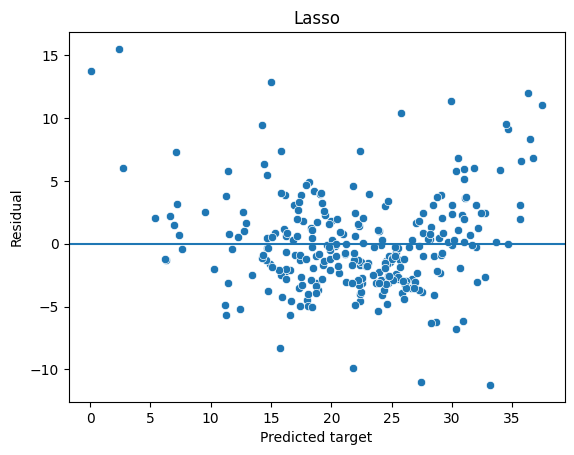

In [ ]:
residual_lasso_pca = residual_plots(lasso_pca, X_train_pca, y_train_pca)

The residuals do not show a significant difference before and after PCA.

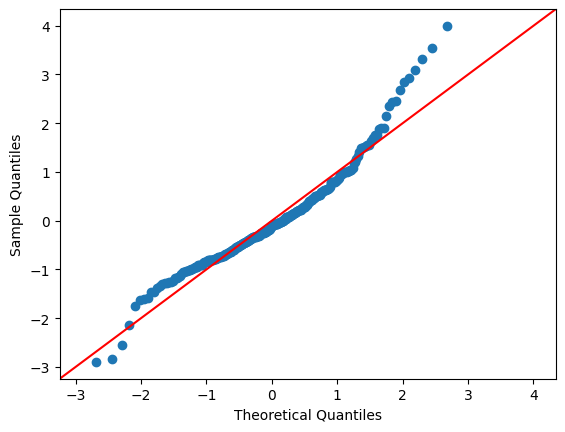

In [ ]:
QQplot(residual_lasso_pca)

There is a slight change in the QQ plot after PCA, but it can still be said that the transformed residuals align with the normality line, indicating normally distributed residuals.

In [ ]:
lasso_pca_scores = model_scores(lasso_pca, X_train_pca, y_train_pca, X_test_pca, y_test_pca, X_val_pca, y_val_pca)
lasso_pca_scores

,Training Lasso,Test Lasso,Validation Lasso
R-squared,0.764680,0.705216,0.673175
RMSE,3.880036,3.866046,4.616054
MAE,2.873128,3.034794,3.392970
MAPE,0.150730,0.177058,0.179801


 Observations:
- The evaluation of the Lasso regression model after PCA shows similar results to the Ridge regression model after PCA. The Lasso model after PCA has a smaller R-squared compared to the Ridge model without PCA. The RMSE, MAE, and MAPE values are increasing, indicating that after PCA, the model's ability to explain the variation in house prices is lower. It also predicts house prices further away from the actual prices and tends to make more errors in estimating house prices at certain percentages of the actual prices.

**Conclusions:**
- Overall, both Ridge regression and Lasso regression models exhibit similar evaluation metrics, with Lasso regression showing slightly outperforming Ridge regression after PCA.
- After performing PCA, the house prediction equation becomes simpler as the features are reduced to 5.
- After PCA, the R-squared tends to decrease, showing a decrease in the model's ability to explain overall data variance. The MAE and RMSE also increase, indicating a decrease in the absolute accuracy of the model's predictions. Additionally, the MAPE tends to be higher, showing the model's tendency to have relatively larger relative prediction errors in percentage terms. Despite the decrease in performance after reducing features with PCA, the model's ability to make predictions is still considered acceptable. Although there's a sacrifice in accuracy, the benefits in simplicity and computational efficiency may outweigh the slight decrease in prediction performance. Therefore, using PCA remains a viable option for reducing dataset dimensions while maintaining reasonably good predictive capability in regression models.
